<h1 style='text-align: center; color: blue;'>DS 203 Assignment 7: Basic Machine Learning Practice</h1>
<h3 style='text-align: right; color: red;'>~ Shubham Lohiya, 18D100020</h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, make_scorer, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

from IPython.display import display
SEED = 123
np.random.seed(SEED)

neg_mean_squared_error = make_scorer(mean_squared_error, greater_is_better=False)
accuracy_scorer = make_scorer(accuracy_score)

<br>

## Question 1

**a. Summarize the grades of all 50 courses that a student using 5 numbers assuming that the performance on some of the courses might be correlated.**  
This is a **dimension reduction** problem.  
*Input*: grades of the 50 courses  
*Output*: the 5 numbers that summarize these 50 grades  

**b. Divide students into unspecified personality groups based student based on their performance in various courses and extra-curricular activities.**  
This is a **clustering** problem.  
*Input*: grades in courses, Indicators of performance in extracurricular activities (like no. of sports medals won, no. of events/competitions participated in, no. of self projects etc.)  
*Output*: each student is assigned to a cluster (no. of clusters is a hyperparameter, the desired number of personality groups)  

**c. Predict the salary of a student after two years of graduating based on his/her performance in various courses, extra-curricular activities, and their first job type.**  
This is a **regression** problem.  
*Input*: course grades, performance indicators for extra-curricular activities, and their first job type (nominal variable)  
*Output*: predicted salary number  

**d. Predict the best type of job for a student based on his/her performance in various courses and extra-curricular activities.**  
This is a **classification** problem.  
*Input*: grades in various courses, performance indicators for extra-curricular activities  
*Output*: the best suited job type (nominal variable)  


<br><br>
## Question 2

1. 
    **Problem**: Classification  
    **Framework**: SVM-C with Gaussian kernel  
    **Target output variable type**: One-Hot  
    **Parameters**: Weights, intercept  
    **Hyper-parameters and their typical value range**: regularization parameter, kernel_type, gamma (kernel coefficient)  
    **Scikit-learn commands for defining, training, and testing**:
    
    ```python
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC # import
model = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel='rbf')) # define
model.fit(X_train, y_train) # train
preds = model.predict(X_test, y_test) # predict
    ```
    
1. 
    **Problem**: Regression   
    **Framework**: SVM-R with Gaussian kernel  
    **Target output variable type**: Float  
    **Parameters**: Weights, intercept  
    **Hyper-parameters and their typical value range**: regularization parameter, kernel_type, gamma (kernel coefficient)  
    **Scikit-learn commands for defining, training, and testing**:
    
    ```python
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR # import
model = make_pipeline(StandardScaler(), SVR(gamma='auto', kernel='rbf')) # define
model.fit(X_train, y_train) # train
preds = model.predict(X_test, y_test) # predict
    ```

1. 
    **Problem**: Classification  
    **Framework**: NN with one hidden layer  
    **Target output variable type**: One-hot  
    **Parameters**: Weights  
    **Hyper-parameters and their typical value range**: Activation function, solver/optimizer, l2 regularization penalty, learning rate, batch size  
    **Scikit-learn commands for defining, training, and testing**:
    
    ```python
from sklearn.neural_network import MLPClassifier # import
model = MLPClassifier(hidden_layer_sizes=(num_neurons, num_classes)) # define
model.fit(X_train, y_train) # train
preds = model.predict(X_test) # predict
    ```

1. 
    **Problem**: Regression  
    **Framework**: NN with one hidden layer  
    **Target output variable type**: Float  
    **Parameters**: Weights  
    **Hyper-parameters and their typical value range**: Activation function, solver/optimizer, l2 regularization penalty, learning rate, batch size  
    **Scikit-learn commands for defining, training, and testing**:
    
    ```python
from sklearn.neural_network import MLPRegressor # import
model = MLPClassifier(hidden_layer_sizes=num_neurons) # define
model.fit(X_train, y_train) # train
preds = model.predict(X_test) # predict
    ```
    
1. 
    **Problem**: Classification  
    **Framework**: Random Forest  
    **Target output variable type**: One-Hot  
    **Parameters**: Weights  
    **Hyper-parameters and their typical value range**: Criterion, maxdepth, number of estimators  
    **Scikit-learn commands for defining, training, and testing**:
    
    ```python
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=max_depth)  # define
model.fit(X_train, y_train) # train
preds = model.predict(X_test) # predict
    ```
    
1. 
    **Problem**: Regression  
    **Framework**: Random Forest  
    **Target output variable type**: Float  
    **Parameters**: Weights  
    **Hyper-parameters and their typical value range**: Criterion, maxdepth, number of estimators  
    **Scikit-learn commands for defining, training, and testing**:
    
    ```python
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=max_depth)  # define
model.fit(X_train, y_train) # train
preds = model.predict(X_test) # predict
    ```
    
1. 
    **Problem**: Clustering  
    **Framework**: K-means  
    **Target output variable type**: Array of labels  
    **Parameters**: Centroids  
    **Hyper-parameters and their typical value range**: number of clusters  
    **Scikit-learn commands for defining, training, and testing**:
    
    ```python
from sklearn.cluster import KMeans  
model = KMeans(n_clusters=n_clusters) # define
model.fit(X_train) # train
print(model.labels_) # show labels of X_train after fit
model.predict(X_test) # predict
    ```

1. 
    **Problem**: Clustering  
    **Framework**: DBSCAN  
    **Target output variable type**: Array of labels  
    **Parameters**: Core points  
    **Hyper-parameters and their typical value range**: eps(max distance), leaf_size  
    **Scikit-learn commands for defining, training, and testing**:
    
    ```python
from sklearn.cluster import DBSCAN  
model = DBSCAN(eps=eps) # define
model.fit(X_train) # train
print(model.labels_) # show labels of X_train after fit
model.fit_predict(X_test) # predict
    ```

1. 
    **Problem**: Dimension reduction  
    **Framework**: PCA  
    **Target output variable type**: Compressed data with lower dimension as compared to input  
    **Parameters**: Eigenvectors  
    **Hyper-parameters and their typical value range**: N_components  
    **Scikit-learn commands for defining, training, and testing**:
    
    ```python
from sklearn.cluster import PCA
model = PCA(n_components=n) # define
model.fit(X) # only fit
X_transformed = model.fit_transform(X) # OR fit using input and return transformed input
model.transform(X_test) # only transform (after model has already been fit
    ```
    
1. 
    **Problem**: Dimension reduction  
    **Framework**: Kernel PCA   
    **Target output variable type**: Compressed data with lower dimension as compared to input  
    **Parameters**: Eigenvectors  
    **Hyper-parameters and their typical value range**: n_components, gamma, alpha, kernel  
    **Scikit-learn commands for defining, training, and testing**:
    
    ```python
from sklearn.cluster import KernelPCA
model = KernelPCA(n_components=n_components, kernel=kernel) # define
model.fit(X) # only fit
X_transformed = model.fit_transform(X) # OR fit using input and return transformed input
model.transform(X_test) # only transform (after model has already been fit
    ```

<br><br>

## Question 3

In [2]:
df = pd.read_csv('SeoulBikeData.csv', encoding = 'ISO-8859-1', parse_dates=['Date'], dayfirst=True)
display(df.head())

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


**a.** The variable to be predicted is 'Rented Bike Count', which is a continuous variable (quantised continous). This is a supervised learning problem with 'Rented Bike Count' as the target variable

**b.** As we are predicting a continuous variable, RMSE seems to be an apt choice for measure of performance.

**c.** All variables except Date seem to be relevant (since the seasonality will already be captured by Seasons, which is correlated with month of the date. Also there are only two distinct years so this isn't expected to help our prediction task.)

**d.** Seasons, Holiday and Functioning Day are unusable as they are given, and must be one-hot encoded for usage. If Date is planned to be used, then it must also be encoded in some form (eg. separated into three variables - day, month and year), and cannot be used as given for the prediction task.


In [3]:
# Drop irrelevant variables
df = df.drop(columns=['Date'])

In [4]:
# check missing values
df.isnull().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

The dataset has no missing values!

In [5]:
# one-hot encoding of categorical variables
categorical = ['Seasons', 'Holiday', 'Functioning Day']
one_hot_dfs = []
for category in categorical:
    one_hot_dfs.append(pd.get_dummies(df[category], prefix=category))
df = df.drop(columns=categorical)
df = pd.concat([df, *one_hot_dfs], axis=1)
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,1,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,1,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,1,0,1,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,1,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,1,0,1,0,1


In [6]:
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=SEED) # get train split for fitting standardizing params

In [7]:
# standardizing the continuous data
cont_cols = ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
            'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
scaler = StandardScaler()
scaler_fit = scaler.fit(train_df[cont_cols])
df[cont_cols] = scaler_fit.transform(df[cont_cols])
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,254,-1.667340,-1.523199,-1.047874,0.462079,0.931809,-1.673497,-0.659589,-0.132735,-0.168209,0,0,0,1,0,1,0,1
1,204,-1.522370,-1.548446,-0.998796,-0.902885,0.931809,-1.673497,-0.659589,-0.132735,-0.168209,0,0,0,1,0,1,0,1
2,173,-1.377401,-1.590525,-0.949717,-0.707890,0.931809,-1.681202,-0.659589,-0.132735,-0.168209,0,0,0,1,0,1,0,1
3,107,-1.232431,-1.607356,-0.900639,-0.805387,0.931809,-1.673497,-0.659589,-0.132735,-0.168209,0,0,0,1,0,1,0,1
4,78,-1.087461,-1.590525,-1.096953,0.559577,0.931809,-1.750547,-0.659589,-0.132735,-0.168209,0,0,0,1,0,1,0,1


In [8]:
# split the data into 70:15:15
indices = np.arange(len(df))
train_df, temp_df, train_idx, temp_idx = train_test_split(df, indices, test_size=0.3, random_state=SEED)
val_df, test_df, val_idx, test_idx = train_test_split(temp_df, temp_idx, test_size=0.5, random_state=SEED)

def df_to_dataset(df):
    data = df.to_numpy()
    X, y = data[:, 1:], data[:, 0]
    return X, y

X, y = df_to_dataset(df)
print(f'Full Data shape: X - {X.shape}, Y - {y.shape}')
X_train, y_train = df_to_dataset(train_df)
print(f'Train Data shape: X - {X_train.shape}, Y - {y_train.shape}')
X_val, y_val = df_to_dataset(val_df)
print(f'Val Data shape: X - {X_val.shape}, Y - {y_val.shape}')
X_test, y_test = df_to_dataset(test_df)
print(f'Test Data shape: X - {X_test.shape}, Y - {y_test.shape}')

Full Data shape: X - (8760, 17), Y - (8760,)
Train Data shape: X - (6132, 17), Y - (6132,)
Val Data shape: X - (1314, 17), Y - (1314,)
Test Data shape: X - (1314, 17), Y - (1314,)


In [9]:
X_train_and_val = np.concatenate((X_train, X_val))
y_train_and_val = np.concatenate((y_train, y_val))
fold = np.array([-1]*len(y_train) + [0]*len(y_val))
ps = PredefinedSplit(test_fold = fold)

<br>

#### Prediction model selection

* Lasso works well for high_dimensional data giving sparse weights as it performs feature selection efficiently. Here, we do not have a lot of variables so Lasso will not be a good choice

* Ridge regression can be used if linear relationship is satisfied between input and output variable. If the relationship is non-linear, Support Vector regression will be able to effectively model this relationship. So we can try SVR

* MLP is a universal approximator, able to learn complex relationships. Only crunch is having enough data for regression. Since we have a decent sized dataset, we can expect MLP to perform well so we'll try it

* Random forest is an ensemble approach, and can provide very good performance over a large portion of the data. It is also more immune to overfitting that the other approaches mentioned, so, we will try this too.

#### SVR

In [10]:
param_grid = {'C': [1, 10, 100, 1000], 'kernel': ['linear', 'rbf']}

In [11]:
clf_svr = GridSearchCV(SVR(), param_grid, scoring=neg_mean_squared_error, n_jobs=8, cv=ps)
clf_svr.fit(X_train_and_val, y_train_and_val)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=SVR(), n_jobs=8,
             param_grid={'C': [1, 10, 100, 1000], 'kernel': ['linear', 'rbf']},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [12]:
clf_svr.best_params_

{'C': 1000, 'kernel': 'rbf'}

In [13]:
svr = SVR(**clf_svr.best_params_)
svr.fit(X_train_and_val, y_train_and_val)

SVR(C=1000)

In [14]:
preds = svr.predict(X_test)
np.sqrt(mean_squared_error(y_test, preds))

301.3494791325927

This is a bad RMSE value, and means that SVR is not able to fit to the data well enough. Let's try our other models!

#### MLP

In [15]:
hidden_sizes = [16, 32, 64, 128]
param_grid = {
    'hidden_layer_sizes': [tuple([i]*2) for i in hidden_sizes],
    'activation': ['tanh', 'relu'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

On various grid searches, 2 hidden layer models were always outperforming 1 hidden layer ones, hence they were dropped from consideration. 3 hidden layer models don't give much performance boost, and take a lot longer to train.

In [16]:
clf_mlpr = GridSearchCV(MLPRegressor(), param_grid, scoring=neg_mean_squared_error, n_jobs=16, cv=ps)
clf_mlpr.fit(X_train_and_val, y_train_and_val)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=MLPRegressor(), n_jobs=16,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(16, 16), (32, 32), (64, 64),
                                                (128, 128)],
                         'learning_rate': ['constant', 'adaptive']},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [17]:
clf_mlpr.best_params_

{'activation': 'relu',
 'alpha': 0.01,
 'hidden_layer_sizes': (128, 128),
 'learning_rate': 'adaptive'}

In [18]:
mlpr = MLPRegressor(**clf_mlpr.best_params_)
mlpr.fit(X_train_and_val, y_train_and_val)

MLPRegressor(alpha=0.01, hidden_layer_sizes=(128, 128),
             learning_rate='adaptive')

In [19]:
preds = mlpr.predict(X_test)
np.sqrt(mean_squared_error(y_test, preds))

268.16538130705493

This RMSE is a lot better than what SVR was able to attain. Based on the test-set performance, this model is usable.There still seems to be room for improvement though.

#### Random Forest

In [20]:
param_grid = {
    'n_estimators': (10, 50, 100, 250, 500),
    'max_depth': (5, 10, 25, 50, 100),
    }

In [21]:
clf_rfr = GridSearchCV(RandomForestRegressor(), param_grid, scoring=neg_mean_squared_error, n_jobs=16, cv=ps)
clf_rfr.fit(X_train_and_val, y_train_and_val)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=RandomForestRegressor(), n_jobs=16,
             param_grid={'max_depth': (5, 10, 25, 50, 100),
                         'n_estimators': (10, 50, 100, 250, 500)},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [22]:
clf_rfr.best_params_

{'max_depth': 50, 'n_estimators': 250}

In [23]:
rfr = RandomForestRegressor(**clf_rfr.best_params_)
rfr.fit(X_train_and_val, y_train_and_val)

RandomForestRegressor(max_depth=50, n_estimators=250)

In [24]:
preds = rfr.predict(X_test)
np.sqrt(mean_squared_error(y_test, preds))

235.47483567669826

This is the best RMSE value attained among all three candidates, though it is quite close to the MLP. Since RFs are more stable and less prone to overfitting, we should prefer this over MLP for similar performance. This model is the most usable.

<br><br>

## Question 4

In [25]:
cols = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16']
df = pd.read_csv('crx.data', names = cols)
df = df.replace("?", np.nan)
df = df.dropna() # get rid of rows with missing values
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [26]:
print('Original Dataset description:')
print(open('crx.names').read().rstrip())

Original Dataset description:

1. Title: Credit Approval

2. Sources: 
    (confidential)
    Submitted by quinlan@cs.su.oz.au

3.  Past Usage:

    See Quinlan,
    * "Simplifying decision trees", Int J Man-Machine Studies 27,
      Dec 1987, pp. 221-234.
    * "C4.5: Programs for Machine Learning", Morgan Kaufmann, Oct 1992
  
4.  Relevant Information:

    This file concerns credit card applications.  All attribute names
    and values have been changed to meaningless symbols to protect
    confidentiality of the data.
  
    This dataset is interesting because there is a good mix of
    attributes -- continuous, nominal with small numbers of
    values, and nominal with larger numbers of values.  There
    are also a few missing values.
  
5.  Number of Instances: 690

6.  Number of Attributes: 15 + class attribute

7.  Attribute Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa,

**a.** The variable (discrete and categorical) to be predicted is the one corresponding to column A16. This is a supervised learning problem.

**b.** This is a classification problem. Since the dataset is mostly balanced, accuracy is a good enough measure of performance

**c. & d.** All of the columns seem relevant and usable for now, though this claim will be verified only after training the model.

In [27]:
# modify some columns
df.A16 = df.A16.apply(lambda x: 1 if x=='+' else 0)
df.A14 = df.A14.apply(int)
df.A2 = df.A2.apply(float)

In [28]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,1


In [29]:
categorical = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']
cont_cols = ['A2', 'A3', 'A8', 'A11', 'A14', 'A15']

In [30]:
# one-hot encoding of categorical variables
one_hot_dfs = []
for category in categorical:
    one_hot_dfs.append(pd.get_dummies(df[category], prefix=category))
df = df.drop(columns=categorical)
df = pd.concat([df, *one_hot_dfs], axis=1)
df.head()

,A2,A3,A8,A11,A14,A15,A16,A1_a,A1_b,A4_l,...,A7_z,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s
0,30.83,0.000,1.25,1,202,0,1,0,1,0,...,0,0,1,0,1,1,0,1,0,0
1,58.67,4.460,3.04,6,43,560,1,1,0,0,...,0,0,1,0,1,1,0,1,0,0
2,24.50,0.500,1.50,0,280,824,1,1,0,0,...,0,0,1,1,0,1,0,1,0,0
3,27.83,1.540,3.75,5,100,3,1,0,1,0,...,0,0,1,0,1,0,1,1,0,0
4,20.17,5.625,1.71,0,120,0,1,0,1,0,...,0,0,1,1,0,1,0,0,0,1


In [31]:
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=SEED) # get train split for fitting standardizing params

In [32]:
# standardizing the continuous data
scaler = StandardScaler()
scaler_fit = scaler.fit(train_df[cont_cols])
df[cont_cols] = scaler_fit.transform(df[cont_cols])
df.head()

,A2,A3,A8,A11,A14,A15,A16,A1_a,A1_b,A4_l,...,A7_z,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s
0,-0.073404,-0.964878,-0.286707,-0.327276,0.112776,-0.174241,1,0,1,0,...,0,0,1,0,1,1,0,1,0,0
1,2.223871,-0.037238,0.231213,0.802371,-0.819389,-0.082194,1,1,0,0,...,0,0,1,0,1,1,0,1,0,0
2,-0.595737,-0.860882,-0.214372,-0.553206,0.570065,-0.038801,1,1,0,0,...,0,0,1,1,0,1,0,1,0,0
3,-0.320955,-0.644572,0.436645,0.576441,-0.485217,-0.173747,1,0,1,0,...,0,0,1,0,1,0,1,1,0,0
4,-0.953036,0.205071,-0.153610,-0.553206,-0.367963,-0.174241,1,0,1,0,...,0,0,1,1,0,1,0,0,0,1


In [33]:
# split the data into 70:15:15
indices = np.arange(len(df))
train_df, temp_df, train_idx, temp_idx = train_test_split(df, indices, test_size=0.3, random_state=SEED)
val_df, test_df, val_idx, test_idx = train_test_split(temp_df, temp_idx, test_size=0.5, random_state=SEED)

def df_to_dataset(df):
    X, y = df.drop(columns=['A16']).to_numpy(), df.A16.to_numpy()
    return X, y

X, y = df_to_dataset(df)
print(f'Full Data shape: X - {X.shape}, Y - {y.shape}')
X_train, y_train = df_to_dataset(train_df)
print(f'Train Data shape: X - {X_train.shape}, Y - {y_train.shape}')
X_val, y_val = df_to_dataset(val_df)
print(f'Val Data shape: X - {X_val.shape}, Y - {y_val.shape}')
X_test, y_test = df_to_dataset(test_df)
print(f'Test Data shape: X - {X_test.shape}, Y - {y_test.shape}')

Full Data shape: X - (653, 46), Y - (653,)
Train Data shape: X - (457, 46), Y - (457,)
Val Data shape: X - (98, 46), Y - (98,)
Test Data shape: X - (98, 46), Y - (98,)


In [34]:
X_train_and_val = np.concatenate((X_train, X_val))
y_train_and_val = np.concatenate((y_train, y_val))
fold = np.array([-1]*len(y_train) + [0]*len(y_val))
ps = PredefinedSplit(test_fold = fold)

<br>

#### Prediction model selection

* For binary classification task, the first logical choice is logistic regression
* We can also try a SVM classifier, as they perform well even in moderate sized datasets, like the one we have
* MLPClassifier can also be tried, but as dataset is small, simpler methods might do better.
* Random Forest classifiers have shown impressive and stable performance, with considerable immunity to overfitting on classification tasks. We'll try this one too!

#### Logistic Regression

In [35]:
param_grid = {'penalty': ['l1', 'l2', 'none'], 'C': [0.1, 1, 10, 100], 'solver': ['liblinear']}

In [36]:
clf_lr = GridSearchCV(LogisticRegression(), param_grid, scoring=accuracy_scorer, n_jobs=16, cv=ps)
clf_lr.fit(X_train_and_val, y_train_and_val)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=LogisticRegression(), n_jobs=16,
             param_grid={'C': [0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'none'],
                         'solver': ['liblinear']},
             scoring=make_scorer(accuracy_score))

In [37]:
clf_lr.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

In [38]:
lr = LogisticRegression(**clf_lr.best_params_)
lr.fit(X_train_and_val, y_train_and_val)

LogisticRegression(C=1, solver='liblinear')

In [39]:
preds = lr.predict(X_test)
accuracy_score(y_test, preds)

0.8979591836734694

This is a decent accuracy for a simple approach like Logistic Regression, but it is usable. We can do better though!

#### SVC

In [40]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'rbf']}

In [41]:
clf_svc = GridSearchCV(SVC(), param_grid, scoring=accuracy_scorer, n_jobs=16, cv=ps)
clf_svc.fit(X_train_and_val, y_train_and_val)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=SVC(), n_jobs=16,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'kernel': ['linear', 'rbf']},
             scoring=make_scorer(accuracy_score))

In [42]:
clf_svc.best_params_

{'C': 10, 'kernel': 'rbf'}

In [43]:
svc = SVC(**clf_svc.best_params_)
svc.fit(X_train_and_val, y_train_and_val)

SVC(C=10)

In [44]:
preds = svc.predict(X_test)
accuracy_score(y_test, preds)

0.8979591836734694

This is exactly same as LR. While still usable, this is not much of an improvement.

#### MLP

In [45]:
hidden_sizes = [16, 32, 64, 128]
param_grid = {
    'hidden_layer_sizes': [tuple([i]*2) for i in hidden_sizes],
    'activation': ['tanh', 'relu', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'batch_size': [8, 16, 32, 64, 128, 'auto']
}

In [46]:
clf_mlpc = GridSearchCV(MLPClassifier(), param_grid, scoring=accuracy_scorer, n_jobs=16, cv=ps)
clf_mlpc.fit(X_train_and_val, y_train_and_val)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=MLPClassifier(), n_jobs=16,
             param_grid={'activation': ['tanh', 'relu', 'logistic'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'batch_size': [8, 16, 32, 64, 128, 'auto'],
                         'hidden_layer_sizes': [(16, 16), (32, 32), (64, 64),
                                                (128, 128)],
                         'learning_rate': ['constant', 'adaptive']},
             scoring=make_scorer(accuracy_score))

In [47]:
clf_mlpc.best_params_

{'activation': 'tanh',
 'alpha': 0.001,
 'batch_size': 'auto',
 'hidden_layer_sizes': (128, 128),
 'learning_rate': 'adaptive'}

In [48]:
mlpc = MLPClassifier(**clf_mlpc.best_params_)
mlpc.fit(X_train_and_val, y_train_and_val)

MLPClassifier(activation='tanh', alpha=0.001, hidden_layer_sizes=(128, 128),
              learning_rate='adaptive')

In [49]:
preds = mlpc.predict(X_test)
accuracy_score(y_test, preds)

0.8673469387755102

As expected, MLP does not do well on this dataset due to the limited data available. The earlier two choices were relatively better.

#### Random Forest

In [50]:
param_grid = {
    'n_estimators': tuple(range(4,21)),
    'max_depth': tuple(range(4,21)),
    }

In [51]:
clf_rfc = GridSearchCV(RandomForestClassifier(), param_grid, scoring=accuracy_scorer, n_jobs=16, cv=ps)
clf_rfc.fit(X_train_and_val, y_train_and_val)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=RandomForestClassifier(), n_jobs=16,
             param_grid={'max_depth': (4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 19, 20),
                         'n_estimators': (4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                          15, 16, 17, 18, 19, 20)},
             scoring=make_scorer(accuracy_score))

In [52]:
clf_rfc.best_params_

{'max_depth': 11, 'n_estimators': 17}

In [53]:
rfc = RandomForestClassifier(**{'max_depth': 4, 'n_estimators': 12})
rfc.fit(X_train_and_val, y_train_and_val)

RandomForestClassifier(max_depth=4, n_estimators=12)

In [54]:
preds = rfc.predict(X_test)
accuracy_score(y_test, preds)

0.8775510204081632

Again we get same accuracy as SVC and LR. All three models seems to do equally better on this task. 

### Question 5

In [55]:
names = ['f'+str(i) for i in range(1,65)] + ['y']

df0 = pd.read_csv('0.csv', header = None)
df1 = pd.read_csv('1.csv', header = None)
df2 = pd.read_csv('2.csv', header = None)
df3 = pd.read_csv('3.csv', header = None)

df = pd.concat([df0, df1, df2, df3], axis=0, ignore_index=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0


In [56]:
X, y = df.drop(columns=[64]), df[64]

In [57]:
# standardizing the data
X = StandardScaler().fit_transform(X)

Our target is to be within 1% of the standard deviation of the L2 norm of the 64 variable input. We perform PCA with the reduced dimension count varying from 1 to 64 to see at what minimum dimension do we achieve our target. This is done by comparing RMSE of the reconstruction with the 1% threshold

In [58]:
# Calculating threshold
threshold = 0.01 * np.std(np.linalg.norm(X, axis = -1))
threshold

0.029265780194476922

In [59]:
recon_errs = [] # to track errors of re-construction from selected subset of eigenvectors
flag = 0
for i in range(1, X.shape[1]+1):
    pca = PCA(n_components=i, random_state=SEED)
    X_compressed = pca.fit_transform(X)
    X_reconstructed = pca.inverse_transform(X_compressed)
    recon_err = mean_squared_error(X, X_reconstructed, squared=False)
    if flag == 0 and recon_err <= threshold:
        flag = 1
        print(f'Minimum dimension that it can be compressed to while achieving target: {i}')
    recon_errs.append(recon_err)

Minimum dimension that it can be compressed to while achieving target: 63


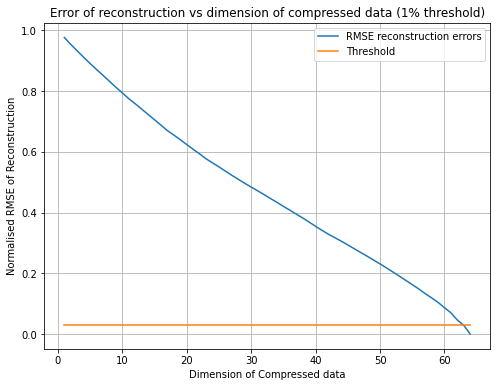

In [60]:
plt.figure(figsize=(8,6))
plt.plot(list(range(1, 65)), recon_errs, label = 'RMSE reconstruction errors')
plt.plot(list(range(1, 65)), [threshold for i in range(1, 65)], label = 'Threshold')
plt.title('Error of reconstruction vs dimension of compressed data (1% threshold)')
plt.xlabel('Dimension of Compressed data')
plt.ylabel('Normalised RMSE of Reconstruction')
plt.legend()
plt.grid()
plt.show()

In [61]:
# trying with 2% threshold

recon_errs = [] # to track errors of re-construction from selected subset of eigenvectors
flag = 0
for i in range(1, X.shape[1]+1):
    pca = PCA(n_components=i, random_state=SEED)
    X_compressed = pca.fit_transform(X)
    X_reconstructed = pca.inverse_transform(X_compressed)
    recon_err = mean_squared_error(X, X_reconstructed, squared=False)
    if flag == 0 and recon_err <= 2*threshold:
        flag = 1
        print(f'Minimum dimension that it can be compressed to while achieving target: {i}')
    recon_errs.append(recon_err)

Minimum dimension that it can be compressed to while achieving target: 62


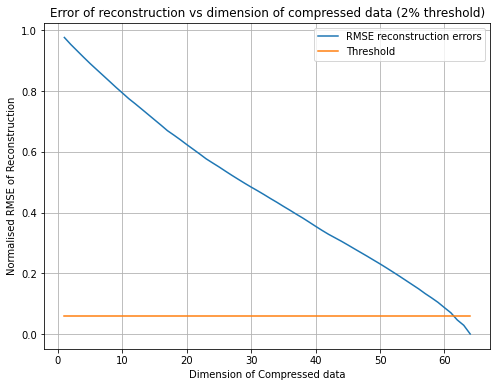

In [62]:
plt.figure(figsize=(8,6))
plt.plot(list(range(1, 65)), recon_errs, label = 'RMSE reconstruction errors')
plt.plot(list(range(1, 65)), [2*threshold for i in range(1, 65)], label = 'Threshold')
plt.title('Error of reconstruction vs dimension of compressed data (2% threshold)')
plt.xlabel('Dimension of Compressed data')
plt.ylabel('Normalised RMSE of Reconstruction')
plt.legend()
plt.grid()
plt.show()